In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Linear Regression

In [3]:
df = pd.read_csv('data4.csv', encoding='ISO-8859-1')
df.head()

,Name,Present,Previous,CU.M.,Amount,Area_Number,Date,Initial
0,"Abainza, Jouie",1056,1051,5,130,1,2020-Jan,130
1,"Adam, Eduardo",NaN,NaN,NaN,NaN,1,2020-Jan,130
2,"Adam, Evelyn II",2178,2164,52,834,1,2020-Jan,130
3,"Agosto, Juanario",4167,4140,27,434,1,2020-Jan,130
4,"Albano, Gina",NaN,NaN,NaN,NaN,1,2020-Jan,130


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65011 entries, 0 to 65010
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         65009 non-null  object
 1   Present      59739 non-null  object
 2   Previous     59866 non-null  object
 3   CU.M.        60003 non-null  object
 4   Amount       59948 non-null  object
 5   Area_Number  65011 non-null  int64 
 6   Date         65011 non-null  object
 7   Initial      65011 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.0+ MB


# Data Cleaning (Pre-Processing)

In [5]:
# Check for missing values
print(df.isnull().sum())

Name              2
Present        5272
Previous       5145
CU.M.          5008
Amount         5063
Area_Number       0
Date              0
Initial           0
dtype: int64


In [6]:
df['Present'] = pd.to_numeric(df['Present'], errors='coerce').fillna(0).astype(int)
df['Previous'] = pd.to_numeric(df['Previous'], errors='coerce').fillna(0).astype(int)
df['CU.M.'] = pd.to_numeric(df['CU.M.'], errors='coerce').fillna(0).astype(int)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65011 entries, 0 to 65010
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         65009 non-null  object
 1   Present      65011 non-null  int32 
 2   Previous     65011 non-null  int32 
 3   CU.M.        65011 non-null  int32 
 4   Amount       65011 non-null  int32 
 5   Area_Number  65011 non-null  int64 
 6   Date         65011 non-null  object
 7   Initial      65011 non-null  int64 
dtypes: int32(4), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%b')

df.set_index('Date', inplace=True)

# Checking the Correlation

C:\Users\cyrus\AppData\Local\Temp\ipykernel_17980\953769093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


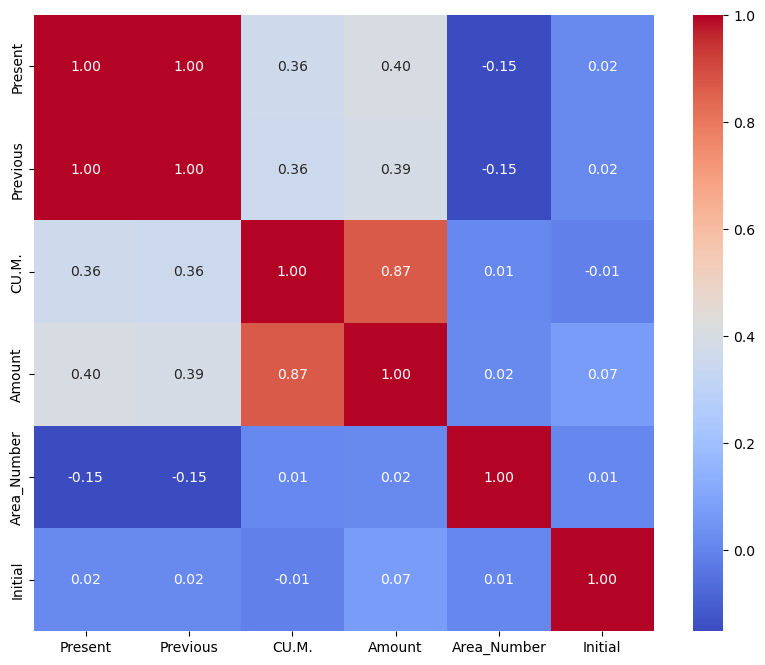

In [8]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

# Data Engineering in the columns that have a high correlation to AMOUNT

In [9]:
# Reset the index to bring Date back as a column
df_reset = df.reset_index()

# Group by the Date and sum both Amount and CU.M. columns
monthly_sum = df_reset.groupby(df_reset['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()

# Round the Amount and CU.M. columns to 2 decimal places
monthly_sum['Amount'] = monthly_sum['Amount'].round(2)
monthly_sum['CU.M.'] = monthly_sum['CU.M.'].round(2)

# Display the result
print(monthly_sum)


       Date  Amount  CU.M.
0   2020-01  391814  24106
1   2020-02  384230  23574
2   2020-03  446286  26434
3   2020-04  424098  25970
4   2020-05  447320  30497
5   2020-06  444322  27419
6   2020-07  428278  26376
7   2020-08  414622  25478
8   2020-09  413302  25371
9   2020-10  410570  25183
10  2020-11  393536  24076
11  2020-12  383500  23464
12  2021-01  397710  24329
13  2021-02  464870  23212
14  2021-03  527832  26836
15  2021-04  513570  26061
16  2021-05  572876  29439
17  2021-06  496962  25059
18  2021-07  494514  24994
19  2021-08  511808  26000
20  2021-09  479242  24098
21  2021-10  495200  24973
22  2021-11  481448  24245
23  2021-12  491672  24779
24  2022-01  487490  24546
25  2022-02  491780  24236
26  2022-03  507728  25734
27  2022-04  497378  25179
28  2022-05  524186  26777
29  2022-06  504590  25645
30  2022-07  516710  26301
31  2022-08  520412  26505
32  2022-09  501054  25377
33  2022-10  514356  26073
34  2022-11  522000  24739
35  2022-12  524620  24784
3

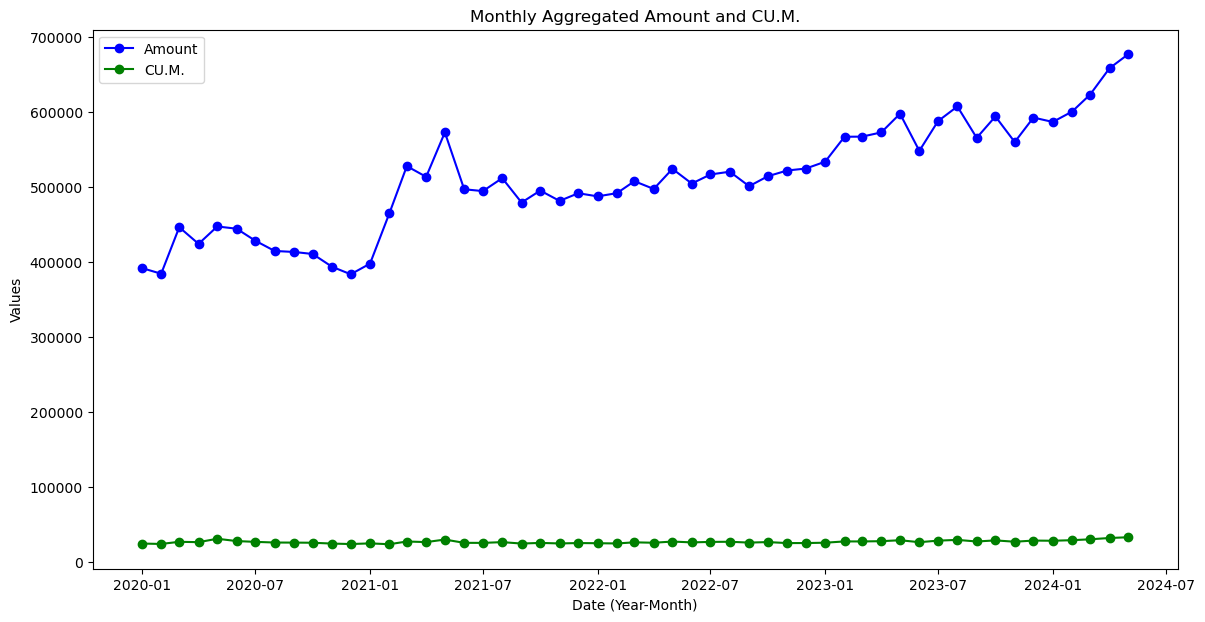

In [10]:
# Convert PeriodIndex to DatetimeIndex for plotting
monthly_sum['Date'] = monthly_sum['Date'].dt.to_timestamp()

# Set the Date as index
monthly_sum.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Line plot for Amount
plt.plot(monthly_sum.index, monthly_sum['Amount'], label='Amount', color='blue', marker='o')

# Line plot for CU.M.
plt.plot(monthly_sum.index, monthly_sum['CU.M.'], label='CU.M.', color='green', marker='o')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Values')
plt.title('Monthly Aggregated Amount and CU.M.')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [11]:
df_reset = df.reset_index()
df_reset['Date'] = pd.to_datetime(df_reset['Date'])
df_reset = df_reset.sort_values(by='Date')

# Define a split point (e.g., 80% of the data for training)
split_point = int(len(df_reset) * 0.8)

# Split into training and testing sets
train = df_reset.iloc[:split_point]
test = df_reset.iloc[split_point:]

# Group and sum Amount and CU.M. columns
train_monthly_sum = train.groupby(train['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()
test_monthly_sum = test.groupby(test['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()

# Round values
train_monthly_sum['Amount'] = train_monthly_sum['Amount'].round(2)
train_monthly_sum['CU.M.'] = train_monthly_sum['CU.M.'].round(2)
test_monthly_sum['Amount'] = test_monthly_sum['Amount'].round(2)
test_monthly_sum['CU.M.'] = test_monthly_sum['CU.M.'].round(2)

# Set Date as index
train_monthly_sum.set_index('Date', inplace=True)
test_monthly_sum.set_index('Date', inplace=True)


# Splitting Data

In [12]:
# Prepare features (X) and target (y) for training
X_train = train_monthly_sum[['CU.M.']]
y_train = train_monthly_sum['Amount']

# Prepare features (X) and target (y) for testing
X_test = test_monthly_sum[['CU.M.']]
y_test = test_monthly_sum['Amount']


In [13]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the Model

In [14]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3450054777.3607273
Mean Absolute Error (MAE): 57352.41969481494
R-squared (R²): 0.8743161835442271


# Visualizing the Predicted and Actual Value

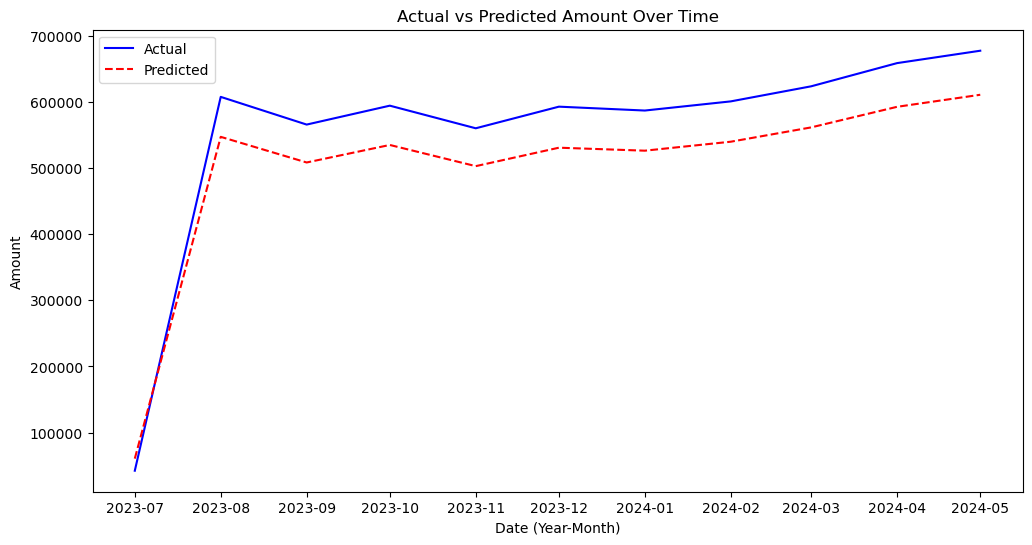

In [15]:
# Ensure y_test.index is converted if it's a PeriodIndex
if isinstance(y_test.index, pd.PeriodIndex):
    y_test.index = y_test.index.to_timestamp()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Amount')
plt.title('Actual vs Predicted Amount Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Forecasting AMOUNT up to Dec 2025

Forecasted Values:
            Predicted_Amount
2024-06-30     498967.165372
2024-07-31     498967.165372
2024-08-31     498967.165372
2024-09-30     498967.165372
2024-10-31     498967.165372
2024-11-30     498967.165372
2024-12-31     498967.165372
2025-01-31     498967.165372
2025-02-28     498967.165372
2025-03-31     498967.165372
2025-04-30     498967.165372
2025-05-31     498967.165372
2025-06-30     498967.165372
2025-07-31     498967.165372
2025-08-31     498967.165372
2025-09-30     498967.165372
2025-10-31     498967.165372
2025-11-30     498967.165372


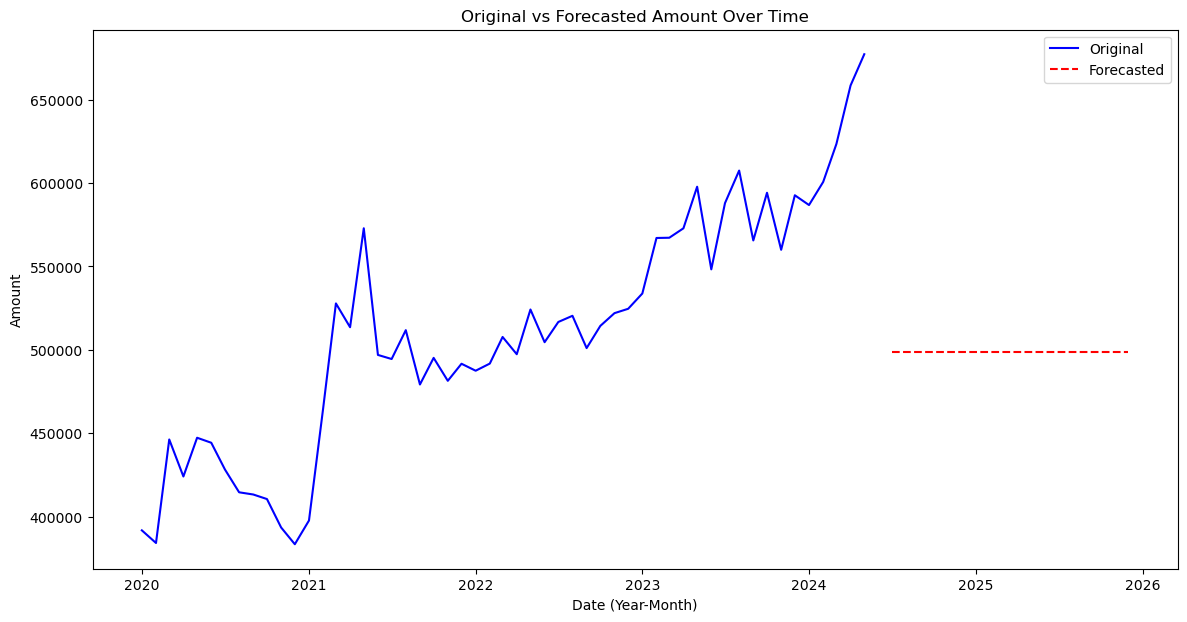

In [17]:
# Prepare features and target variable
X = monthly_sum[['CU.M.']]
y = monthly_sum['Amount']

# Forecast future values
future_dates = pd.date_range(start=monthly_sum.index.max() + pd.DateOffset(months=1), end='2025-12-01', freq='M')
future_df = pd.DataFrame(index=future_dates)
future_df['CU.M.'] = X['CU.M.'].mean()  # Placeholder for future CU.M. values
X_future = future_df[['CU.M.']]
future_df['Predicted_Amount'] = model.predict(X_future)

# Print the forecasted values
print("Forecasted Values:")
print(future_df[['Predicted_Amount']])

# Combine original data with forecasted data
original_data = monthly_sum.copy()
original_data['Source'] = 'Original'

# Append forecasted data
future_df['Amount'] = np.nan  # Set Amount to NaN for forecasted data
future_df['Source'] = 'Forecasted'

# Combine both datasets
combined_df = pd.concat([original_data, future_df])

# Plot actual and forecasted values
plt.figure(figsize=(14, 7))

# Plot original values
plt.plot(original_data.index, original_data['Amount'], label='Original', color='blue')

# Plot forecasted values
plt.plot(future_df.index, future_df['Predicted_Amount'], label='Forecasted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Amount')
plt.title('Original vs Forecasted Amount Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()

df_reset = df.reset_index()

# Group by the Date and sum both Amount and CU.M. columns
monthly_sum = df_reset.groupby(df_reset['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()

# Round the Amount and CU.M. columns to 2 decimal places
monthly_sum['Amount'] = monthly_sum['Amount'].round(2)
monthly_sum['CU.M.'] = monthly_sum['CU.M.'].round(2)

# Convert PeriodIndex to DatetimeIndex
monthly_sum['Date'] = monthly_sum['Date'].dt.to_timestamp()
monthly_sum.set_index('Date', inplace=True)

# Prepare features and target variable
X = monthly_sum[['CU.M.']]
y = monthly_sum['Amount']

# Split the data into training and testing sets
split_point = int(len(monthly_sum) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast future values
future_dates = pd.date_range(start=monthly_sum.index.max() + pd.DateOffset(months=1), end='2025-12-01', freq='M')
future_df = pd.DataFrame(index=future_dates)
future_df['CU.M.'] = X['CU.M.'].mean()  # Placeholder for future CU.M. values
X_future = future_df[['CU.M.']]
future_df['Predicted_Amount'] = model.predict(X_future)

# Print the forecasted values
print("Forecasted Values:")
print(future_df[['Predicted_Amount']])

# Combine original data with forecasted data
original_data = monthly_sum.copy()
original_data['Source'] = 'Original'

# Append forecasted data
future_df['Amount'] = np.nan  # Set Amount to NaN for forecasted data
future_df['Source'] = 'Forecasted'

# Combine both datasets
combined_df = pd.concat([original_data, future_df])

# Plot actual and forecasted values
plt.figure(figsize=(14, 7))

# Plot original values
plt.plot(original_data.index, original_data['Amount'], label='Original', color='blue')

# Plot forecasted values
plt.plot(future_df.index, future_df['Predicted_Amount'], label='Forecasted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Amount')
plt.title('Original vs Forecasted Amount Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Predicting the Cubic Meter

In [19]:
df_reset = df.reset_index()
df_reset['Date'] = pd.to_datetime(df_reset['Date'])
df_reset = df_reset.sort_values(by='Date')

# Define a split point (e.g., 80% of the data for training)
split_point = int(len(df_reset) * 0.8)

# Split into training and testing sets
train = df_reset.iloc[:split_point]
test = df_reset.iloc[split_point:]

# Group and sum Amount and CU.M. columns
train_monthly_sum = train.groupby(train['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()
test_monthly_sum = test.groupby(test['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()

# Round values
train_monthly_sum['Amount'] = train_monthly_sum['Amount'].round(2)
train_monthly_sum['CU.M.'] = train_monthly_sum['CU.M.'].round(2)
test_monthly_sum['Amount'] = test_monthly_sum['Amount'].round(2)
test_monthly_sum['CU.M.'] = test_monthly_sum['CU.M.'].round(2)

# Set Date as index
train_monthly_sum.set_index('Date', inplace=True)
test_monthly_sum.set_index('Date', inplace=True)


# Train Splitting the Data

In [20]:
# Prepare features (X) and target (y) for training
X_train = train_monthly_sum[['Amount']]
y_train = train_monthly_sum['CU.M.']

# Prepare features (X) and target (y) for testing
X_test = test_monthly_sum[['Amount']]
y_test = test_monthly_sum['CU.M.']


# Data Modelling

In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the Model

In [22]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 34154856.03875177
Mean Absolute Error (MAE): 3225.696995934391
R-squared (R²): 0.45382658332503556


# Visualizing the Predicted and Actual Value

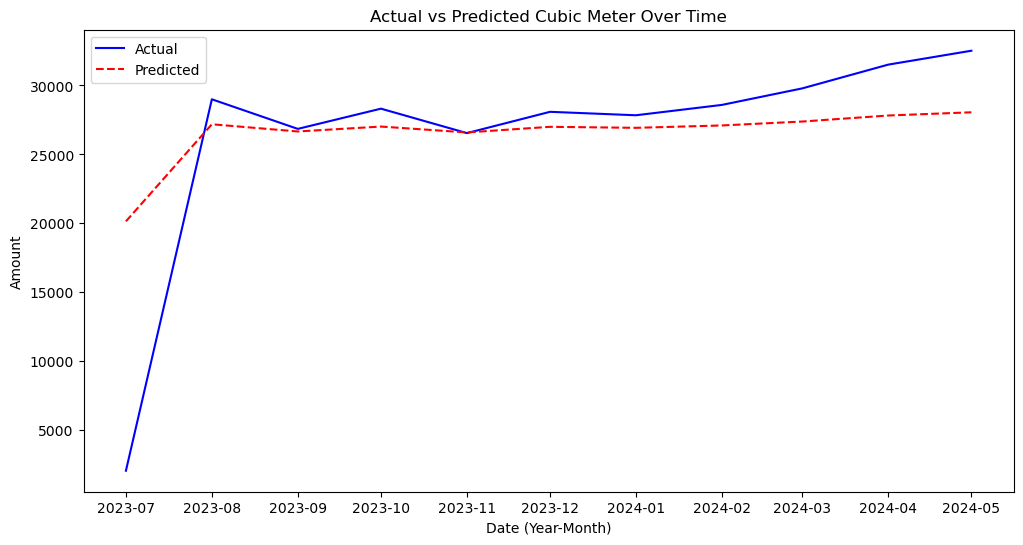

In [23]:
# Ensure y_test.index is converted if it's a PeriodIndex
if isinstance(y_test.index, pd.PeriodIndex):
    y_test.index = y_test.index.to_timestamp()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Amount')
plt.title('Actual vs Predicted Cubic Meter Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Forecasting Cubic Meter Up to Dec 2025

Forecasted Values for CU.M.:
            Predicted_CU.M.
2024-06-30     25996.939234
2024-07-31     25996.939234
2024-08-31     25996.939234
2024-09-30     25996.939234
2024-10-31     25996.939234
2024-11-30     25996.939234
2024-12-31     25996.939234
2025-01-31     25996.939234
2025-02-28     25996.939234
2025-03-31     25996.939234
2025-04-30     25996.939234
2025-05-31     25996.939234
2025-06-30     25996.939234
2025-07-31     25996.939234
2025-08-31     25996.939234
2025-09-30     25996.939234
2025-10-31     25996.939234
2025-11-30     25996.939234


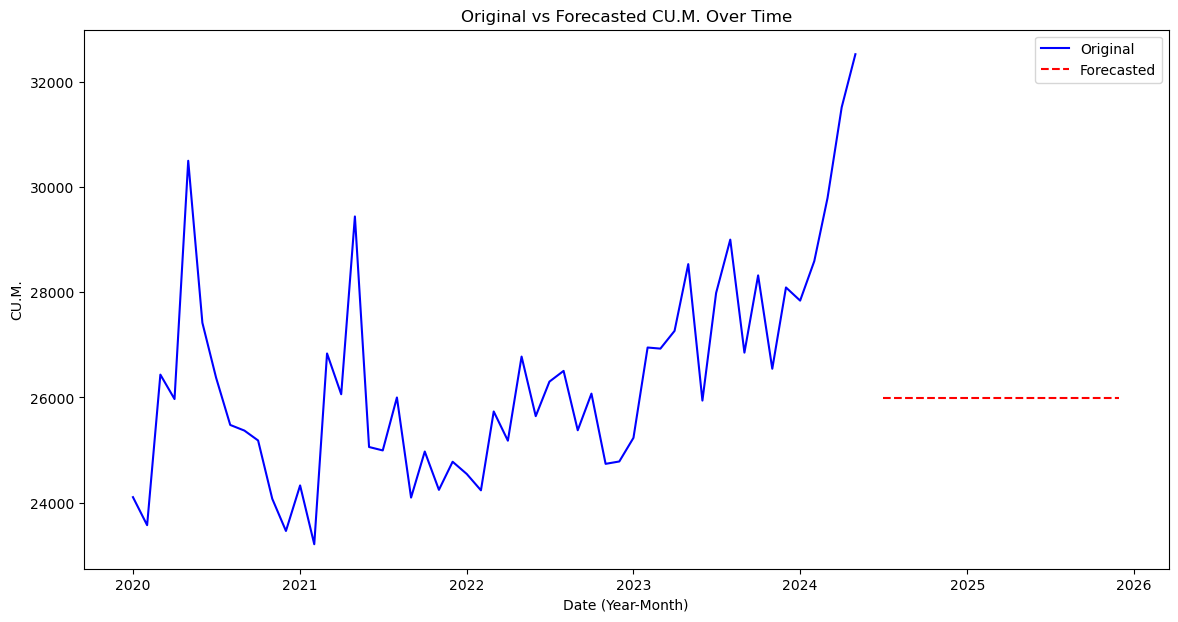

In [24]:
# Prepare features and target variable
X = monthly_sum[['Amount']]  # Feature
y = monthly_sum['CU.M.']     # Target

# Split the data into training and testing sets
split_point = int(len(monthly_sum) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast future values
future_dates = pd.date_range(start=monthly_sum.index.max() + pd.DateOffset(months=1), end='2025-12-01', freq='M')
future_df = pd.DataFrame(index=future_dates)
future_df['Amount'] = monthly_sum['Amount'].mean()  # Placeholder for future Amount values
X_future = future_df[['Amount']]
future_df['Predicted_CU.M.'] = model.predict(X_future)

# Print the forecasted values
print("Forecasted Values for CU.M.:")
print(future_df[['Predicted_CU.M.']])

# Combine original data with forecasted data
original_data = monthly_sum.copy()
original_data['Source'] = 'Original'

# Append forecasted data
future_df['CU.M.'] = np.nan  # Set CU.M. to NaN for forecasted data
future_df['Source'] = 'Forecasted'

# Combine both datasets
combined_df = pd.concat([original_data, future_df])

# Plot actual and forecasted values
plt.figure(figsize=(14, 7))

# Plot original values
plt.plot(original_data.index, original_data['CU.M.'], label='Original', color='blue')

# Plot forecasted values
plt.plot(future_df.index, future_df['Predicted_CU.M.'], label='Forecasted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('CU.M.')
plt.title('Original vs Forecasted CU.M. Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Reset the index to bring Date back as a column
df_reset = df.reset_index()

# Group by the Date and sum both Amount and CU.M. columns
monthly_sum = df_reset.groupby(df_reset['Date'].dt.to_period('M'))[['Amount', 'CU.M.']].sum().reset_index()

# Round the Amount and CU.M. columns to 2 decimal places
monthly_sum['Amount'] = monthly_sum['Amount'].round(2)
monthly_sum['CU.M.'] = monthly_sum['CU.M.'].round(2)

# Convert PeriodIndex to DatetimeIndex
monthly_sum['Date'] = monthly_sum['Date'].dt.to_timestamp()
monthly_sum.set_index('Date', inplace=True)

# Prepare features and target variable
X = monthly_sum[['Amount']]  # Feature
y = monthly_sum['CU.M.']     # Target

# Split the data into training and testing sets
split_point = int(len(monthly_sum) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast future values
future_dates = pd.date_range(start=monthly_sum.index.max() + pd.DateOffset(months=1), end='2025-12-01', freq='M')
future_df = pd.DataFrame(index=future_dates)
future_df['Amount'] = monthly_sum['Amount'].mean()  # Placeholder for future Amount values
X_future = future_df[['Amount']]
future_df['Predicted_CU.M.'] = model.predict(X_future)

# Print the forecasted values
print("Forecasted Values for CU.M.:")
print(future_df[['Predicted_CU.M.']])

# Combine original data with forecasted data
original_data = monthly_sum.copy()
original_data['Source'] = 'Original'

# Append forecasted data
future_df['CU.M.'] = np.nan  # Set CU.M. to NaN for forecasted data
future_df['Source'] = 'Forecasted'

# Combine both datasets
combined_df = pd.concat([original_data, future_df])

# Plot actual and forecasted values
plt.figure(figsize=(14, 7))

# Plot original values
plt.plot(original_data.index, original_data['CU.M.'], label='Original', color='blue')

# Plot forecasted values
plt.plot(future_df.index, future_df['Predicted_CU.M.'], label='Forecasted', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('CU.M.')
plt.title('Original vs Forecasted CU.M. Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()